## Observations and Insights 

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset    
combined_mice_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [194]:
# Checking the number of mice in the DataFrame.
len(combined_mice_df['Mouse ID'].unique())

249

In [195]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupID = combined_mice_df[combined_mice_df.duplicated(['Mouse ID', 'Timepoint'])]
dupID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [196]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID = combined_mice_df[combined_mice_df['Mouse ID'] == "g989"]
duplicateID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [197]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_mice_df[combined_mice_df['Mouse ID'] != "g989"]
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [198]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df['Mouse ID'].unique())

248

## Summary Statistics

In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Drug Regimen
# drugRegimen_gb = clean_mice_df.groupby(["Drug Regimen"])

# Calculations for tumor data
mean_tumor_vol = clean_mice_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_mice_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = clean_mice_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_stdev = clean_mice_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_mice_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

tumor_summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                              "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Std. Dev.": tumor_stdev,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_summary_df


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [200]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculations for tumor data
Summary_Stats_Tumor = clean_mice_df.groupby('Drug Regimen').agg({
        'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]
        })

Summary_Stats_Tumor

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0.5, 0, 'Drug Regimen')

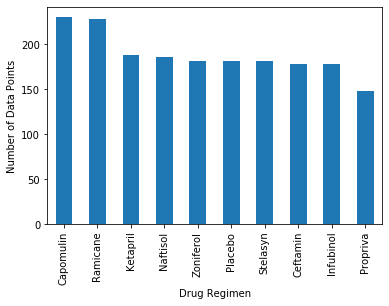

In [201]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Gather and sort data for plot
mice_per_timepoint = clean_mice_df.groupby('Drug Regimen').count()['Timepoint']

mice_per_datapoint = mice_per_timepoint.reset_index()

mice_per_datapoint = mice_per_datapoint.sort_values("Timepoint", ascending=False)

mice_per_datapoint = mice_per_datapoint.set_index("Drug Regimen")

# Plot
mice_per_datapoint.plot(kind="bar", legend=False)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

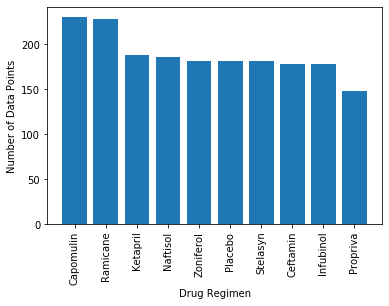

In [202]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Gather and sort data for plot
mice_per_timepoint2 = clean_mice_df.groupby('Drug Regimen').count()['Timepoint']

mice_per_datapoint2 = mice_per_timepoint2.reset_index()

mice_per_datapoint2 = mice_per_datapoint2.sort_values("Timepoint", ascending=False)

# Plot
plt.bar(mice_per_datapoint2['Drug Regimen'], mice_per_datapoint2['Timepoint'])
plt.xticks(rotation="vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

## Pie Plots

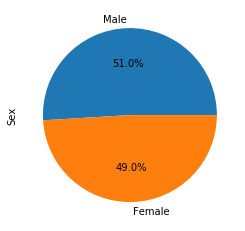

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# gather data for pie chart
mice_gender = clean_mice_df.Sex.value_counts()

# plot
mice_gender.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

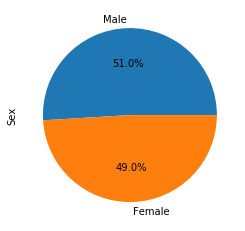

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# gather data for pie chart
mice_gender2 = clean_mice_df.Sex.value_counts()
# mice_gender2

# Plot
labels = ['Male', 'Female']
sizes = [958, 922]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_df = clean_mice_df.sort_values(by=['Mouse ID', 'Timepoint'])

final_tumor_df = final_tumor_df.drop_duplicates(subset="Mouse ID", keep='last')
 
cap_tumor_df = final_tumor_df[(final_tumor_df['Drug Regimen'] == "Capomulin")]

ram_tumor_df = final_tumor_df[(final_tumor_df['Drug Regimen'] == "Ramicane")]

inf_tumor_df = final_tumor_df[(final_tumor_df['Drug Regimen'] == "Infubinol")]

cef_tumor_df = final_tumor_df[(final_tumor_df['Drug Regimen'] == "Ceftamin")]

In [206]:
# Quantitatively determine capomulin outliers
cap_quartiles = cap_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outliers_df = cap_tumor_df[(cap_tumor_df['Tumor Volume (mm3)'] > cap_upper_bound) | (cap_tumor_df['Tumor Volume (mm3)'] < cap_lower_bound)]
print("Capomulin potential outliers: " + (cap_outliers_df['Tumor Volume (mm3)']).to_string(index=False))

Capomulin potential outliers: Series([], )


In [207]:
# Quantitatively determine ramicane outliers
ram_quartiles = ram_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_outliers_df = ram_tumor_df[(ram_tumor_df['Tumor Volume (mm3)'] > ram_upper_bound) | (ram_tumor_df['Tumor Volume (mm3)'] < ram_lower_bound)]
print("Ramicane potential outliers: " + (ram_outliers_df['Tumor Volume (mm3)']).to_string(index=False))

Ramicane potential outliers: Series([], )


In [208]:
# Quantitatively determine infubinol outliers
inf_quartiles = inf_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_outliers_df = inf_tumor_df[(inf_tumor_df['Tumor Volume (mm3)'] > inf_upper_bound) | (inf_tumor_df['Tumor Volume (mm3)'] < inf_lower_bound)]
print("Infubinol potential outliers: " + (inf_outliers_df['Tumor Volume (mm3)']).to_string(index=False))

Infubinol potential outliers:  36.321346


In [209]:
# Quantitatively determine ceftamin outliers
cef_quartiles = cef_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_outliers_df = cef_tumor_df[(cef_tumor_df['Tumor Volume (mm3)'] > cef_upper_bound) | (cef_tumor_df['Tumor Volume (mm3)'] < cef_lower_bound)]
print("Ceftamin potential outliers: " + (cef_outliers_df['Tumor Volume (mm3)']).to_string(index=False))

Ceftamin potential outliers: Series([], )


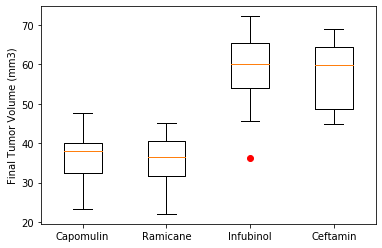

In [210]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

cap_tumor = cap_tumor_df['Tumor Volume (mm3)']
ram_tumor = ram_tumor_df['Tumor Volume (mm3)']
inf_tumor = inf_tumor_df['Tumor Volume (mm3)']
cef_tumor = cef_tumor_df['Tumor Volume (mm3)']

final_tumor_vol_plot = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol_plot, 0, 'r')
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

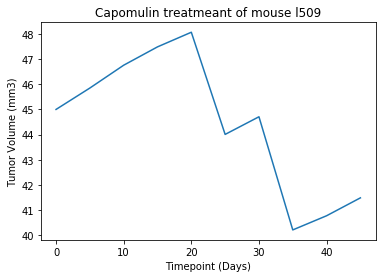

In [211]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l509_line_plot = clean_mice_df[clean_mice_df['Mouse ID'] == "l509"]

x_axis = l509_line_plot['Timepoint']
y_axis = l509_line_plot['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

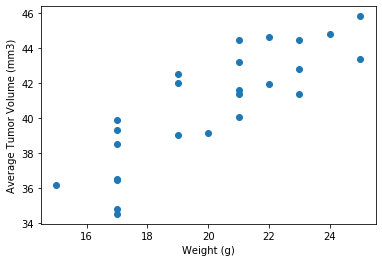

In [215]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scat_plot = clean_mice_df[clean_mice_df['Drug Regimen'] == "Capomulin"]
cap_avg_scat = capomulin_scat_plot.groupby(['Mouse ID']).mean()

x_axis = cap_avg_scat['Weight (g)']
y_axis = cap_avg_scat['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


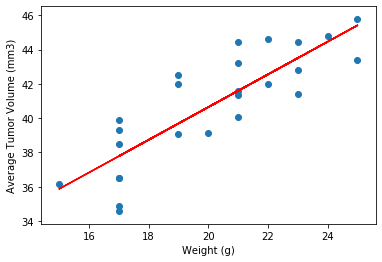

In [216]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_scat_plot = clean_mice_df[clean_mice_df['Drug Regimen'] == "Capomulin"]
cap_avg_scat = capomulin_scat_plot.groupby(['Mouse ID']).mean()

x_axis = cap_avg_scat['Weight (g)']
y_axis = cap_avg_scat['Tumor Volume (mm3)']

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis)
plt.show()